In [124]:
#unsupervised learning using KMeans clustering where we have used a dataset to check the voice frequency
#of males and females based on age with voice frequency data

In [125]:
import pandas as pd

In [126]:
df=pd.read_csv('/kaggle/input/gender-age-classification/gender_age_classification_dataset.csv')

In [127]:
pd.set_option('display.max_columns',None)

In [128]:
df=df[df['gender']=='female']

In [129]:
df.head()

,age,height_cm,weight_kg,bmi,shoulder_width_cm,waist_circumference_cm,hip_circumference_cm,waist_hip_ratio,chest_circumference_cm,hand_length_cm,foot_length_cm,neck_circumference_cm,wrist_circumference_cm,voice_frequency_hz,stride_length_cm,grip_strength_kg,pulse_rate_bpm,systolic_bp_mmhg,body_fat_percentage,bone_density_g_cm2,gender,age_category,target
1,26,163.1,65.8,24.7,36.5,70.2,101.6,0.691,94.3,16.2,21.5,31.6,14.4,209.9,66.9,36.7,100.0,131.0,26.1,1.308,female,young,young_female
5,26,160.3,83.0,32.3,37.5,67.7,89.3,0.759,88.1,16.3,19.9,35.2,15.0,209.3,72.1,31.7,71.0,118.0,24.6,1.196,female,young,young_female
10,22,162.4,71.0,26.9,36.6,81.2,102.3,0.794,89.3,15.9,22.2,33.8,15.1,225.8,76.8,36.5,73.0,124.0,30.3,1.144,female,young,young_female
11,69,170.0,74.2,25.7,39.5,85.4,130.6,0.654,96.6,18.4,24.4,33.6,14.6,229.0,64.1,13.1,79.0,110.0,22.6,1.011,female,old,old_female
12,22,154.8,77.2,32.2,37.5,72.0,86.0,0.838,85.9,17.5,21.0,27.0,14.0,231.0,76.9,25.3,74.0,120.0,35.7,1.263,female,young,young_female


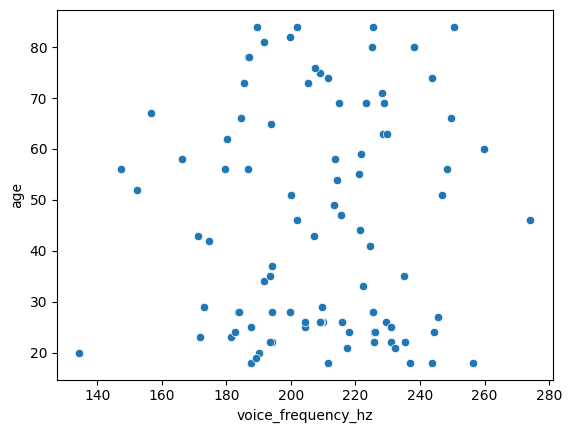

In [130]:
import matplotlib.pyplot as plt
import seaborn as sb
# plt.scatter(df['age_category'],df['age'])
sb.scatterplot(x=df['voice_frequency_hz'],y=df['age'],data=df)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

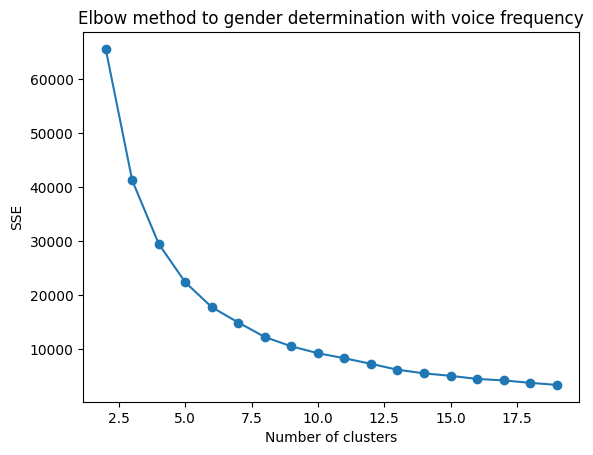

In [131]:
from sklearn.cluster import KMeans
sse=[]
k_range= range(2,20)
for k in k_range:
    km=KMeans(n_clusters=k)
    y_pred=km.fit(df[['voice_frequency_hz','age']])
    sse.append(km.inertia_)


plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.plot(k_range, sse, marker='o')
plt.title('Elbow method to gender determination with voice frequency')
plt.show()

In [132]:
km=KMeans(n_clusters=8)
y_pred=km.fit(df[['voice_frequency_hz', 'age']])
y_pred

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [133]:
df['Cluster']= y_pred.labels_

In [134]:
df.head()

,age,height_cm,weight_kg,bmi,shoulder_width_cm,waist_circumference_cm,hip_circumference_cm,waist_hip_ratio,chest_circumference_cm,hand_length_cm,foot_length_cm,neck_circumference_cm,wrist_circumference_cm,voice_frequency_hz,stride_length_cm,grip_strength_kg,pulse_rate_bpm,systolic_bp_mmhg,body_fat_percentage,bone_density_g_cm2,gender,age_category,target,Cluster
1,26,163.1,65.8,24.7,36.5,70.2,101.6,0.691,94.3,16.2,21.5,31.6,14.4,209.9,66.9,36.7,100.0,131.0,26.1,1.308,female,young,young_female,0
5,26,160.3,83.0,32.3,37.5,67.7,89.3,0.759,88.1,16.3,19.9,35.2,15.0,209.3,72.1,31.7,71.0,118.0,24.6,1.196,female,young,young_female,0
10,22,162.4,71.0,26.9,36.6,81.2,102.3,0.794,89.3,15.9,22.2,33.8,15.1,225.8,76.8,36.5,73.0,124.0,30.3,1.144,female,young,young_female,6
11,69,170.0,74.2,25.7,39.5,85.4,130.6,0.654,96.6,18.4,24.4,33.6,14.6,229.0,64.1,13.1,79.0,110.0,22.6,1.011,female,old,old_female,2
12,22,154.8,77.2,32.2,37.5,72.0,86.0,0.838,85.9,17.5,21.0,27.0,14.0,231.0,76.9,25.3,74.0,120.0,35.7,1.263,female,young,young_female,6


In [135]:
df['Cluster'].value_counts()

Cluster
6    16
5    16
1    15
0    11
2    11
7    11
3     8
4     5
Name: count, dtype: int64

In [136]:
km.cluster_centers_

array([[209.92727273,  25.        ],
       [194.7       ,  73.8       ],
       [230.63636364,  73.27272727],
       [160.35      ,  49.25      ],
       [255.76      ,  55.8       ],
       [186.9875    ,  25.9375    ],
       [234.1375    ,  24.1875    ],
       [214.07272727,  49.72727273]])

In [137]:
df1=df[df['Cluster']==0]
df2=df[df['Cluster']==1]
df3=df[df['Cluster']==2]
df4=df[df['Cluster']==3]
df5=df[df['Cluster']==4]
df6=df[df['Cluster']==5]
df7=df[df['Cluster']==6]
df8=df[df['Cluster']==7]


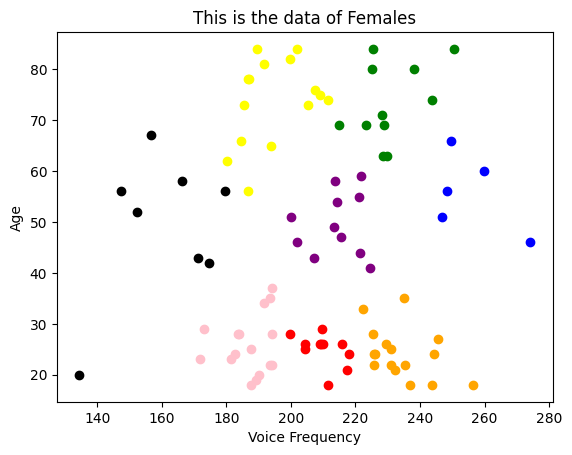

In [138]:
plt.xlabel('Voice Frequency')
plt.ylabel('Age')
plt.scatter(df1['voice_frequency_hz'],df1['age'],color='red', label='cluster 1')
plt.scatter(df2['voice_frequency_hz'],df2['age'],color='yellow', label='cluster 2')
plt.scatter(df3['voice_frequency_hz'],df3['age'],color='green', label='cluster 3')
plt.scatter(df4['voice_frequency_hz'],df4['age'],color='black', label='cluster 4')
plt.scatter(df5['voice_frequency_hz'],df5['age'],color='blue', label='cluster 5')
plt.scatter(df6['voice_frequency_hz'],df6['age'],color='pink', label='cluster 6')
plt.scatter(df7['voice_frequency_hz'],df7['age'],color='orange', label='cluster 7')
plt.scatter(df8['voice_frequency_hz'],df8['age'],color='purple', label='cluster 8')
plt.title('This is the data of Females')
plt.show()